In [1]:
import numpy as np
import pandas as pd
import mikutoolkit as miku
from matplotlib import pyplot as plt
plt.style.use("solarized-light")

あなたもミクと創ろう、世界を繋ごう。


In [2]:
sonar = pd.read_csv("./sonar.all-data.csv", names=[ "s%02d" % k for k in range(60) ] + ["class"])

In [3]:
X = sonar.values[ : , : (-1) ].astype(float)

In [4]:
y = []
for k in range(sonar.values.shape[0]):
    if sonar.values[ k , (-1) ] == "R":
        y.append(( +1 , -1 ))
    else:
        y.append(( -1 , +1 ))
y = np.array(y)

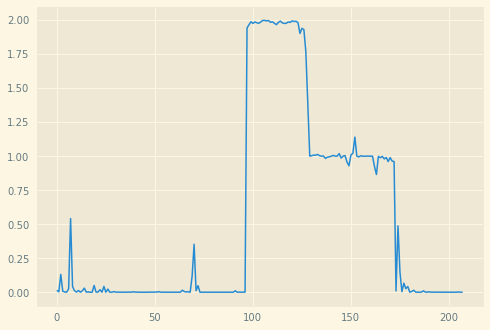

In [5]:
fc = miku.ae.psi.FC(y.shape[1], X.shape[1])
losshist = []
for _ in range(1):
    for k in range(X.shape[0]):
        losshist.append(fc.loss(fc.predict(X[ k : (k + 1) , : ]), y[ k : (k + 1) , : ]).mean())
        fc = fc.fit(X[ k : (k + 1) , : ], y[ k : (k + 1) , : ])
with plt.rc_context({}):
    plt.plot(losshist)
    plt.show()